In [1]:
### IMPORTS
import os
import csv
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
### Get dataset from csv files in a folder

GEy_conc = [12.5,25.0,37.5,50.0,62.5,75.0,87.5,100.0,112.5,125.0]
GEa_conc = [12.5,25.0,37.5,50.0,62.5,75.0,87.5,100.0,112.5,125.0]
GCO_conc = [25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,250.0]
GMe_conc = [25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,250.0]

def get_dataset_label(PATH):
    label = np.array([])
    dataset = np.empty((0,2400), dtype=float)
    
    for filename in os.listdir(PATH):
        label = np.append(label, filename[7:10])

        df = pd.read_csv(PATH+filename)

        columns_to_concatenate = [col for col in df.columns if col != 'timestamp']

        concatenated_row = pd.concat([df[col] for col in columns_to_concatenate], ignore_index=True)

        dataset = np.concatenate([dataset, [concatenated_row]])
        
    return dataset, label

def get_concentration(filename):
    gas_label = filename[7:10]
    conc_idx = int(float(filename[12:15])/10) - 1
    if gas_label == 'GEy':
        return GEy_conc[conc_idx]
    elif gas_label == 'GEa':
        return GEa_conc[conc_idx]
    elif gas_label == 'GCO':
        return GCO_conc[conc_idx]
    elif gas_label == 'GMe':
        return GMe_conc[conc_idx]
    return 'error'

def get_dataset_concentrations(PATH, GAS_NAME):
    concentrations = np.array([])
    dataset = np.empty((0,2400), dtype=float)
    
    for filename in os.listdir(PATH):
        if filename[7:10] == GAS_NAME:
            concentrations = np.append(concentrations, get_concentration(filename))

            df = pd.read_csv(PATH+filename)

            columns_to_concatenate = [col for col in df.columns if col != 'timestamp']

            concatenated_row = pd.concat([df[col] for col in columns_to_concatenate], ignore_index=True)

            dataset = np.concatenate([dataset, [concatenated_row]])
        
    return dataset, concentrations


In [3]:
### Split the data into training and testing sets

DATASET_PATH = 'data1/training_samples/'

## Classifier data
gas_sample, labels = get_dataset_label(DATASET_PATH)
gas_sample_train, gas_sample_test, labels_train, labels_test = train_test_split(gas_sample, labels, test_size=0.2)

## Regression data
gco_sample, gco_conc = get_dataset_concentrations(DATASET_PATH, 'GCO')
gea_sample, gea_conc = get_dataset_concentrations(DATASET_PATH, 'GEa')
gey_sample, gey_conc = get_dataset_concentrations(DATASET_PATH, 'GEy')
gme_sample, gme_conc = get_dataset_concentrations(DATASET_PATH, 'GMe')

gco_sample_train, gco_sample_test, gco_conc_train, gco_conc_test = train_test_split(gco_sample, gco_conc, test_size=0.2)
gea_sample_train, gea_sample_test, gea_conc_train, gea_conc_test = train_test_split(gea_sample, gea_conc, test_size=0.2)
gey_sample_train, gey_sample_test, gey_conc_train, gey_conc_test = train_test_split(gey_sample, gey_conc, test_size=0.2)
gme_sample_train, gme_sample_test, gme_conc_train, gme_conc_test = train_test_split(gme_sample, gme_conc, test_size=0.2)



In [4]:
### Create an SVM classifier
clf = svm.SVC(kernel='linear')  # You can change the kernel to 'rbf' for non-linear data

# Train the SVM classifier on the training data
clf.fit(gas_sample_train, labels_train)

### Create an SVM regression model
gco_regressor = SVR(kernel='linear')  # You can change the kernel to 'rbf' for non-linear data
gea_regressor = SVR(kernel='linear')  # You can change the kernel to 'rbf' for non-linear data
gey_regressor = SVR(kernel='linear')  # You can change the kernel to 'rbf' for non-linear data
gme_regressor = SVR(kernel='linear')  # You can change the kernel to 'rbf' for non-linear data

# Train the SVM regression model on the training data
gco_regressor.fit(gco_sample_train, gco_conc_train)
gea_regressor.fit(gea_sample_train, gea_conc_train)
gey_regressor.fit(gey_sample_train, gey_conc_train)
gme_regressor.fit(gme_sample_train, gme_conc_train)

SVR(kernel='linear')

In [5]:
# Make predictions on the test data
labels_pred = clf.predict(gas_sample_test)

print("predicted",labels_pred)
print("actual",labels_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(labels_test, labels_pred)
print("Classifier Accuracy:", accuracy)
print("\n")

# Make regressions on the test data
gco_conc_pred = gco_regressor.predict(gco_sample_test)
gea_conc_pred = gea_regressor.predict(gea_sample_test)
gey_conc_pred = gey_regressor.predict(gey_sample_test)
gme_conc_pred = gme_regressor.predict(gme_sample_test)

gco_mse = mean_squared_error(gco_conc_test, gco_conc_pred)
gea_mse = mean_squared_error(gea_conc_test, gea_conc_pred)
gey_mse = mean_squared_error(gey_conc_test, gey_conc_pred)
gme_mse = mean_squared_error(gme_conc_test, gme_conc_pred)

formatted_list = [round(num, 2) for num in gco_conc_pred]
print("CO predict concentrations:", formatted_list)
print("CO actual concentrations:", gco_conc_test)
print("CO Mean Squared Error:", gco_mse)
print("\n")

formatted_list = [round(num, 2) for num in gea_conc_pred]
print("Ethanol predict concentrations:", formatted_list)
print("Ethanol actual concentrations:", gea_conc_test)
print("Ethanol Mean Squared Error:", gea_mse)
print("\n")

formatted_list = [round(num, 2) for num in gey_conc_pred]
print("Ethylene predict concentrations:", formatted_list)
print("Ethylene actual concentrations:", gey_conc_test)
print("Ethylene Mean Squared Error:", gey_mse)
print("\n")

formatted_list = [round(num, 2) for num in gme_conc_pred]
print("CH4 predict concentrations:", formatted_list)
print("CH4 actual concentrations:", gme_conc_test)
print("CH4 Mean Squared Error:", gme_mse)


predicted ['GCO' 'GMe' 'GEa' 'GCO' 'GMe' 'GEy' 'GEa' 'GEa']
actual ['GCO' 'GMe' 'GEa' 'GCO' 'GMe' 'GEy' 'GEa' 'GEa']
Classifier Accuracy: 1.0


CO predict concentrations: [196.5, 50.83]
CO actual concentrations: [175.  50.]
CO Mean Squared Error: 231.3898840794229


Ethanol predict concentrations: [68.25, 116.94]
Ethanol actual concentrations: [ 62.5 125. ]
Ethanol Mean Squared Error: 49.04476407799559


Ethylene predict concentrations: [97.99, 83.19]
Ethylene actual concentrations: [100.  75.]
Ethylene Mean Squared Error: 35.53128487550696


CH4 predict concentrations: [147.53, 129.13]
CH4 actual concentrations: [125. 100.]
CH4 Mean Squared Error: 678.2233231462338


In [6]:
### Direct standardization
# Smaster = Sslave F -> F = (Sslave^-1)*Smaster

def calculate_transformation_matrix(Smaster, Sslave):
    Sslave_pseudo_inverse = np.linalg.pinv(Sslave)
    F = np.matmul(Sslave_pseudo_inverse, Smaster)
    return F

def map_to_master_space(new_sample, transformation_matrix):
    mapped_sample = np.matmul(new_sample, transformation_matrix)
    return mapped_sample

In [7]:
### Calculate transformation matrix

MASTERSET_PATH = 'data1/calibration_samples/master/'
SLAVESET_PATH= 'data1/calibration_samples/slave/'

master_set, master_label = get_dataset_label(MASTERSET_PATH)
slave_set, slave_label = get_dataset_label(SLAVESET_PATH)

F = calculate_transformation_matrix(master_set, slave_set)

In [8]:
### Map new sample

NEWSET_PATH = 'data1/calibration_samples/new/'

new_set, new_label = get_dataset_label(NEWSET_PATH)

mapped_sample = map_to_master_space(new_set, F)

# Save to file
header = ['timestamp', 'TGS2611-5.65','TGS2612-5.65','TGS2610-5.65','TGS2602-5.65','TGS2611 5.00','TGS2612-5.00','TGS2610-5.00', 'TGS2602-5.00']  # Custom header for the CSV file

mapped_df = pd.DataFrame()
mapped_df[header[0]] = range(0,600,2)
for i in range(8):
    mapped_df[header[i+1]] = pd.DataFrame(mapped_sample.T[300*i:300+300*i])

mapped_df.to_csv('data1/calibration_samples/mapped_samples.csv',index=False)

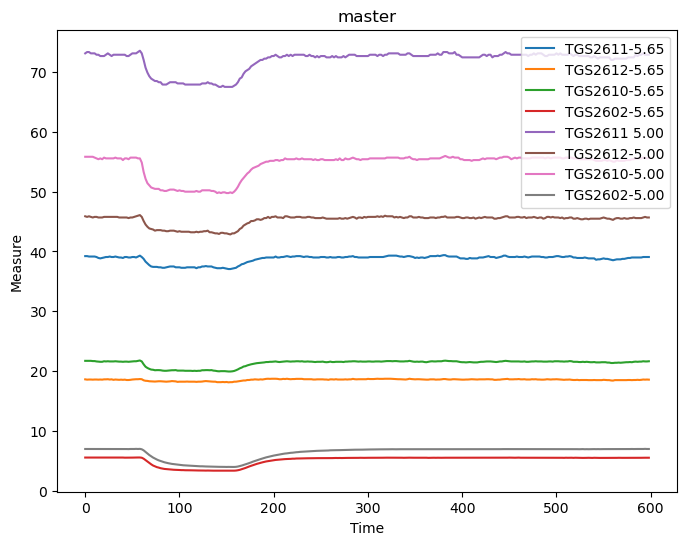

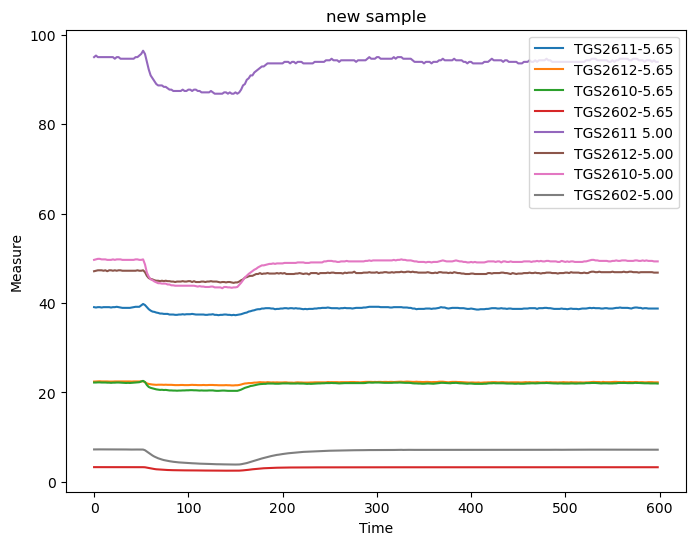

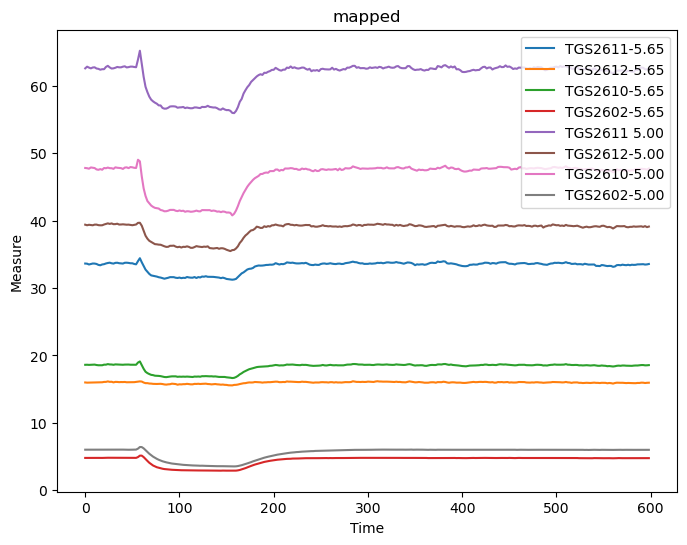

In [12]:
### Plot graphs

import matplotlib.pyplot as plt

def plot_data_from_csv(csv_file, column_list, graph_name):
    color_names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract the header names as time vector and data series
    time_vector = 'timestamp'
    
    # Create the figure and axis objects
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    
    for column_name in column_list[1:]:
        ax.plot(df[time_vector], df[column_name], label=column_name)
        
    ax.set_xlabel('Time')
    ax.set_ylabel('Measure')
    ax.set_title(graph_name)
    ax.legend(loc='upper right')
    
    # Show the plot
    plt.show()


plot_data_from_csv('data1/calibration_samples/master/new_B1_GCO_F040_R1.csv', header, 'master')
plot_data_from_csv('data1/calibration_samples/new/new_B2_GCO_F040_R2.csv', header, 'new sample')
plot_data_from_csv('data1/calibration_samples/mapped_samples.csv', header, 'mapped')